In [1]:
import pandas as pd
df_ipc = pd.read_csv('./dat/idescat-aec-15361-1.csv', sep = ";", decimal = ",")
df_ipc

,anyy,nom_categ,ord_any,id_categ,ipc,status
0,2025,Índex general,1,1,117.6,NaN
1,2025,Aliments i begudes no alcohòliques,1,2,129.3,NaN
2,2025,Begudes alcohòliques i tabac,1,3,120.6,NaN
3,2025,Vestit i calçat,1,4,110.1,NaN
4,2025,Habitatge,1,5,112.5,NaN
...,...,...,...,...,...,...
307,2002,Comunicacions,24,9,126.5,NaN
308,2002,Esbarjo i cultura,24,10,95.1,NaN
309,2002,Ensenyament,24,11,55.0,NaN
310,2002,"Hotels, cafès i restaurants",24,12,62.7,NaN


In [2]:
df_ipc[df_ipc.anyy == 2024]

,anyy,nom_categ,ord_any,id_categ,ipc,status
13,2024,Índex general,2,1,114.8,NaN
14,2024,Aliments i begudes no alcohòliques,2,2,126.1,NaN
15,2024,Begudes alcohòliques i tabac,2,3,116.3,NaN
16,2024,Vestit i calçat,2,4,109.1,NaN
17,2024,Habitatge,2,5,107.3,NaN
18,2024,Parament de casa,2,6,113.0,NaN
19,2024,Medicina,2,7,106.7,NaN
20,2024,Transports,2,8,113.2,NaN
21,2024,Comunicacions,2,9,101.7,NaN
22,2024,Esbarjo i cultura,2,10,110.9,NaN


In [3]:
df_ipc.info()
#df_ipc.drop(columns=['status'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   anyy       312 non-null    int64  
 1   nom_categ  312 non-null    object 
 2   ord_any    312 non-null    int64  
 3   id_categ   312 non-null    int64  
 4   ipc        312 non-null    float64
 5   status     0 non-null      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 14.8+ KB


In [4]:
df_sou = pd.read_csv('./dat/idescat-basics-10400-1.csv', sep = ";", decimal = ",")
df_sou

,anyy,nom_agrup,ord_any,id_agrup,salari,status
0,2023,Salari brut anual mitjà,1,1,29978.69,NaN
1,2023,Menys de 25 anys,1,2,15639.00,NaN
2,2023,De 25 a 34 anys,1,3,25879.12,NaN
3,2023,De 35 a 44 anys,1,4,30572.04,NaN
4,2023,De 45 a 54 anys,1,5,32359.07,NaN
...,...,...,...,...,...,...
115,2004,Menys de 25 anys,20,2,12614.96,NaN
116,2004,De 25 a 34 anys,20,3,18052.58,NaN
117,2004,De 35 a 44 anys,20,4,22293.37,NaN
118,2004,De 45 a 54 anys,20,5,24170.28,NaN


In [5]:
df_sou.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   anyy       120 non-null    int64  
 1   nom_agrup  120 non-null    object 
 2   ord_any    120 non-null    int64  
 3   id_agrup   120 non-null    int64  
 4   salari     120 non-null    float64
 5   status     6 non-null      object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.8+ KB


In [6]:
#df_sou.drop(columns=['status'], inplace=True)

In [7]:
df_ipc_filt = df_ipc[df_ipc.id_categ==1][['anyy', 'ipc']]
df_sou_filt = df_sou[df_sou.id_agrup==1][['anyy', 'salari']]
df_union = pd.merge(df_ipc_filt, df_sou_filt, on="anyy", how="inner")
df_union

,anyy,ipc,salari
0,2023,111.7,29978.69
1,2022,108.0,28774.55
2,2021,100.0,28145.02
3,2020,97.2,27100.11
4,2019,97.6,25968.20
5,2018,96.7,25552.84
6,2017,95.0,25180.45
7,2016,93.0,24454.64
8,2015,92.9,24321.57
9,2014,93.1,23927.17


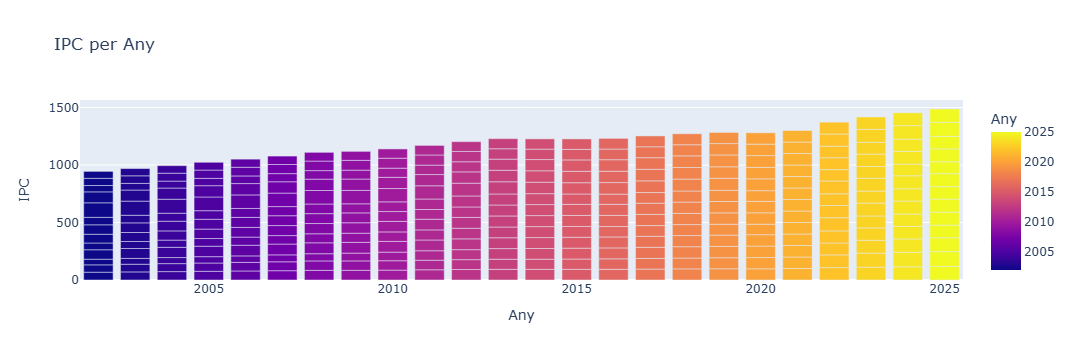

In [8]:
import pandas as pd
import plotly.express as px

# Carregar dades
df_ipc = pd.read_csv('./dat/idescat-aec-15361-1.csv', sep=";", decimal=",")

# Eliminar la columna 'status' si existeix
if 'status' in df_ipc.columns:
    df_ipc = df_ipc.drop(columns=['status'])

# Gràfic de barres IPC per any
fig = px.bar(
    df_ipc,
    x="anyy",          # substitueix pel nom correcte de la columna d'any
    y="ipc",          # substitueix pel nom correcte de la columna IPC
    color="anyy", 
    labels=
            {"anyy": "Any",
           "ipc": "IPC"
           }, # dona un color diferent a cada any
    title="IPC per Any"
)

fig.show()




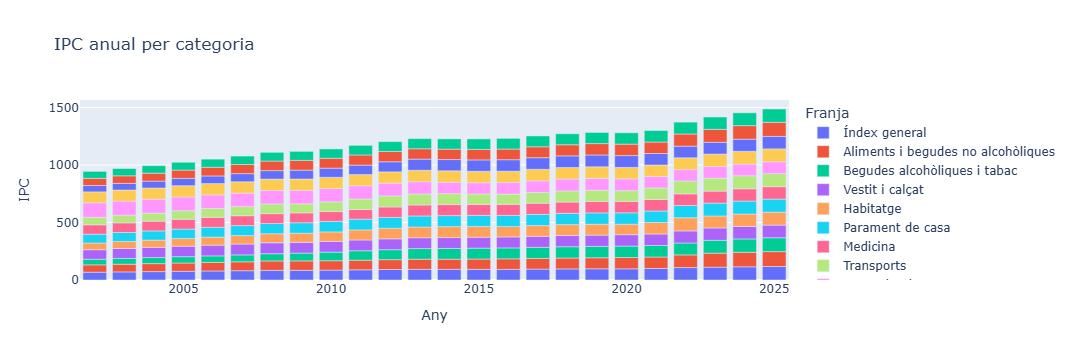

In [9]:
import pandas as pd
import plotly.express as px

# Eliminar columna 'status' si existeix
if "status" in df_ipc.columns:
    df_ipc = df_ipc.drop(columns=["status"])


# Gràfic de barres
fig = px.bar(
    df_ipc,
    x="anyy",
    y="ipc",
    color="nom_categ",
    labels={"anyy": "Any", "ipc": "IPC", "nom_categ": "Franja"},
    title="IPC anual per categoria"
)

fig.show()

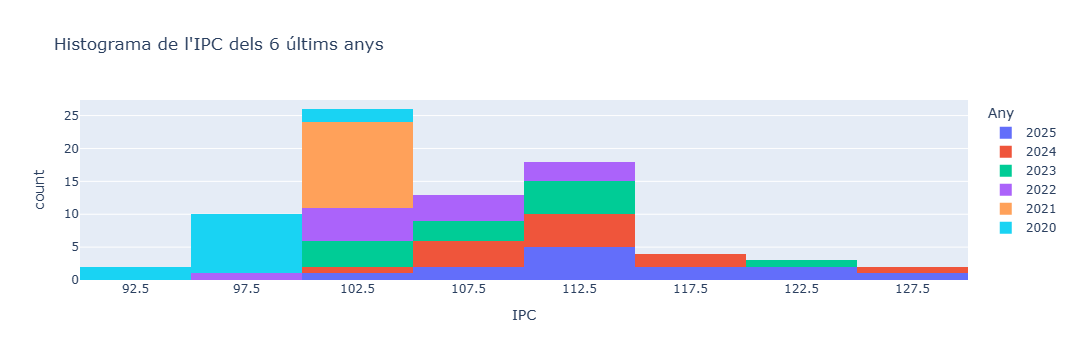

In [10]:
# Eliminar la columna 'status' si existeix
if 'status' in df_ipc.columns:
    df_ipc = df_ipc.drop(columns=['status'])

# Filtrar els 6 últims anys
ultims_anys = sorted(df_ipc["anyy"].unique())[-6]
df_filtrat = df_ipc[df_ipc["anyy"] >= ultims_anys]

# Histograma dels 6 últims anys
fig = px.histogram(
    df_filtrat,
    x="ipc",
    color="anyy",
    labels={
        "anyy": "Any",
        "ipc": "IPC"
    },
    title="Histograma de l'IPC dels 6 últims anys"
)

fig.show()


In [11]:
#df_filtrat[df_filtrat.anyy == 2025]
df_filtrat[df_filtrat.anyy == 2021]

,anyy,nom_categ,ord_any,id_categ,ipc
52,2021,Índex general,5,1,100.0
53,2021,Aliments i begudes no alcohòliques,5,2,100.0
54,2021,Begudes alcohòliques i tabac,5,3,100.0
55,2021,Vestit i calçat,5,4,100.0
56,2021,Habitatge,5,5,100.0
57,2021,Parament de casa,5,6,100.0
58,2021,Medicina,5,7,100.0
59,2021,Transports,5,8,100.0
60,2021,Comunicacions,5,9,100.0
61,2021,Esbarjo i cultura,5,10,100.0


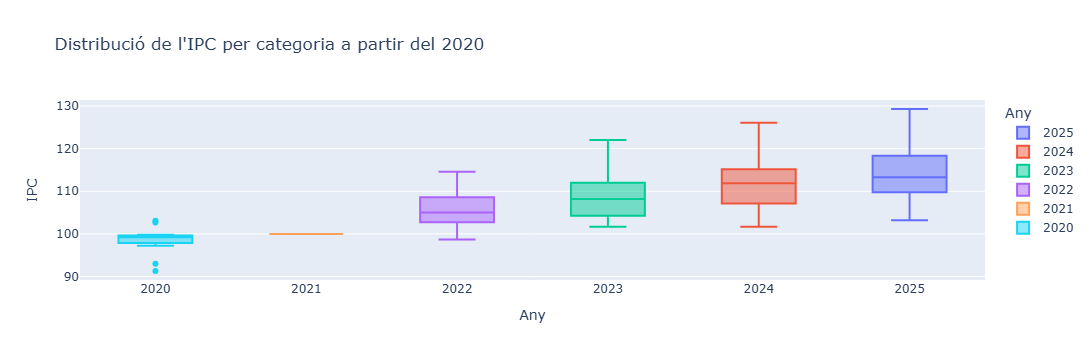

In [12]:
# Eliminar la columna 'status' si existeix
if 'status' in df_ipc.columns:
    df_ipc = df_ipc.drop(columns=['status'])

# Filtrar els últims 6 anys
ultims_6 = sorted(df_ipc["anyy"].unique())[-6]
df_filtrat = df_ipc[df_ipc["anyy"] >= ultims_6]

# Boxplot IPC per als últims 5 anys
fig = px.box(
    df_filtrat,
    x="anyy",
    y="ipc",
    color="anyy",
    labels={
        "anyy": "Any",
        "ipc": "IPC"
    },
    title="Distribució de l'IPC per categoria a partir del 2020"
)

fig.show()



In [13]:
ff = pd.read_csv('./dat/idescat-basics-salari.csv', sep=";", decimal=",")
ff

,anyy,nom_agrup,ord_any,id_agrup,salari,status
0,2023,Salari brut anual mitjà,1,1,29978.69,NaN
1,2023,Menys de 25 anys,1,2,15639.00,NaN
2,2023,De 25 a 34 anys,1,3,25879.12,NaN
3,2023,De 35 a 44 anys,1,4,30572.04,NaN
4,2023,De 45 a 54 anys,1,5,32359.07,NaN
...,...,...,...,...,...,...
115,2004,Menys de 25 anys,20,2,12614.96,NaN
116,2004,De 25 a 34 anys,20,3,18052.58,NaN
117,2004,De 35 a 44 anys,20,4,22293.37,NaN
118,2004,De 45 a 54 anys,20,5,24170.28,NaN


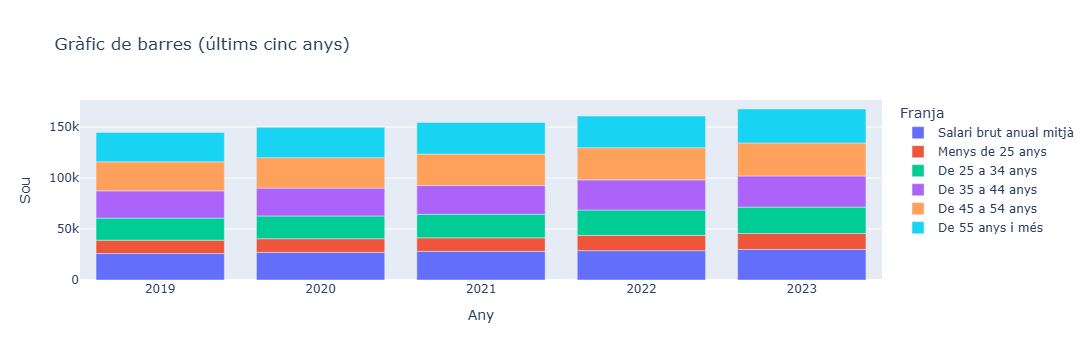

In [14]:
#2
import pandas as pd
import plotly.express as px

# Eliminar columna 'status' si existeix
if "status" in df_sou.columns:
    df_sou = df_sou.drop(columns=["status"])

# --- Filtrar els últims 5 anys ---
ultims_5 = sorted(df_sou["anyy"].unique())[-5]
df_sou_5 = df_sou[df_sou["anyy"] >= ultims_5]

# Gràfic de barres
fig = px.bar(
    df_sou_5,
    x="anyy",
    y="salari",
    color="nom_agrup",
    labels={"anyy": "Any", "salari": "Sou", "nom_agrup": "Franja"},
    title="Gràfic de barres (últims cinc anys)"
)

fig.show()


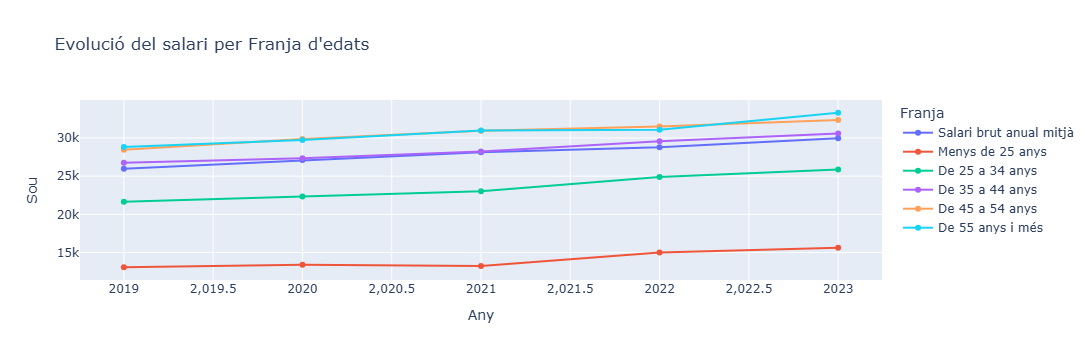

In [15]:
# Eliminar columna 'status' si existeix
if "status" in df_sou.columns:
    df_sou = df_sou.drop(columns=["status"])

# --- Filtrar els últims 5 anys ---
ultims_5 = sorted(df_sou["anyy"].unique())[-5]
df_sou_5 = df_sou[df_sou["anyy"] >= ultims_5]

# Gràfic de línia
fig = px.line(
    df_sou_5,
    x="anyy",
    y="salari",
    color="nom_agrup",
    markers=True,
    labels={"anyy": "Any", "salari": "Sou", "nom_agrup": "Franja"},
    title="Evolució del salari per Franja d'edats"
)

fig.show()


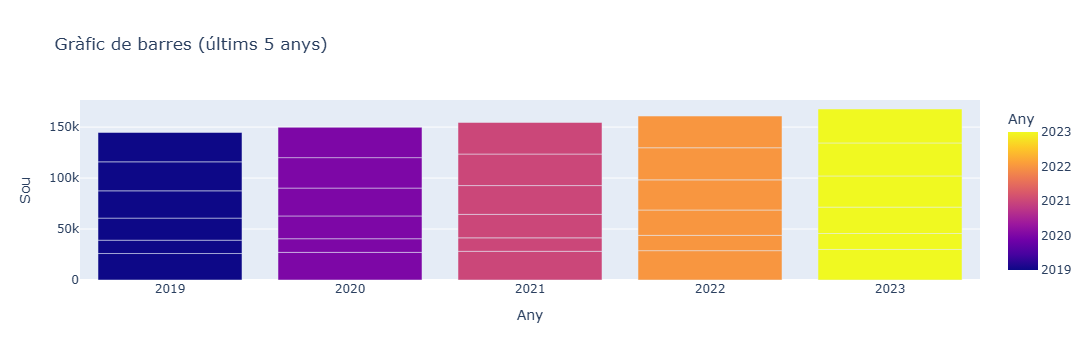

In [16]:
import pandas as pd
import plotly.express as px

df_sou = pd.read_csv('./dat/idescat-basics-10400-1.csv', sep=";", decimal=",")

# Eliminar columna 'status' si existeix
if "status" in df_sou.columns:
    df_sou = df_sou.drop(columns=["status"])

# Filtrar els últims 5 anys
ultims_5 = sorted(df_sou["anyy"].unique())[-5]
df_filtrat = df_sou[df_sou["anyy"] >= ultims_5]

# Gràfic de barres només dels últims 5 anys
fig = px.bar(
    df_filtrat,
    x="anyy",
    y="salari",
    color="anyy",
    labels={"anyy": "Any", "salari": "Sou", "salari": "Sou"},
    title="Gràfic de barres (últims 5 anys)"
)

fig.show()


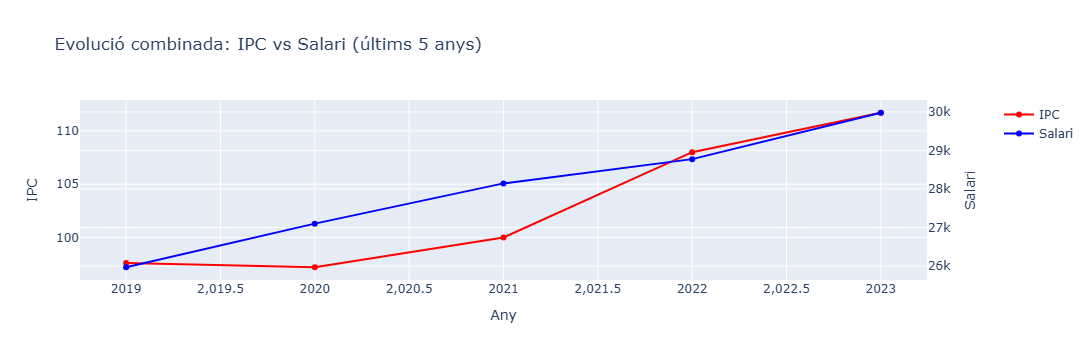

In [17]:
#3
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_ipc_filt = df_ipc[df_ipc.id_categ==1][['anyy', 'ipc']]
df_sou_filt = df_sou[df_sou.id_agrup==1][['anyy', 'salari']]
df_union = pd.merge(df_ipc_filt, df_sou_filt, on="anyy", how="inner")
df_union
# --- Filtrar els últims 5 anys ---
ultims_5 = sorted(df_union["anyy"].unique())[-5]
df_union_5 = df_union[df_union["anyy"] >= ultims_5]

# Crear figura amb dos eixos Y
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Línia IPC
fig.add_trace(
    go.Scatter(
        x=df_union_5["anyy"],
        y=df_union_5["ipc"],
        mode="lines+markers",
        name="IPC",
        line=dict(color="red")
    ),
    secondary_y=False
)

# Línia Salari
fig.add_trace(
    go.Scatter(
        x=df_union_5["anyy"],
        y=df_union_5["salari"],
        mode="lines+markers",
        name="Salari",
        line=dict(color="blue")
    ),
    secondary_y=True
)

# Etiquetes i títol
fig.update_layout(
    title="Evolució combinada: IPC vs Salari (últims 5 anys)",
    xaxis_title="Any"
)

fig.update_yaxes(title_text="IPC", secondary_y=False)
fig.update_yaxes(title_text="Salari", secondary_y=True)

fig.show()
#Prdección


In [18]:
df_union_5

,anyy,ipc,salari
0,2023,111.7,29978.69
1,2022,108.0,28774.55
2,2021,100.0,28145.02
3,2020,97.2,27100.11
4,2019,97.6,25968.20


In [19]:
#4 Renda Atur joves
import pandas as pd
import plotly.express as px

df_renda = pd.read_csv('./dat/idescat-RendaAtur.csv', sep=";", decimal=",")
df_renda

,idx,anyy,RendaLlar,TxAturJoves
0,0,2024,21.5,22.1
1,1,2023,26.8,22.4
2,2,2022,22.7,24.4
3,3,2021,27.9,28.9
4,4,2020,27.4,34.0
5,5,2019,24.1,26.2
6,6,2018,24.9,27.7
7,7,2017,29.7,30.4
8,8,2016,25.1,34.3
9,9,2015,21.7,42.3


In [20]:
df_renda.head()

,idx,anyy,RendaLlar,TxAturJoves
0,0,2024,21.5,22.1
1,1,2023,26.8,22.4
2,2,2022,22.7,24.4
3,3,2021,27.9,28.9
4,4,2020,27.4,34.0


In [21]:
df_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   idx          15 non-null     int64  
 1   anyy         15 non-null     int64  
 2   RendaLlar    15 non-null     float64
 3   TxAturJoves  15 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 608.0 bytes


In [22]:
df_renda.describe()

,idx,anyy,RendaLlar,TxAturJoves
count,15.000000,15.000000,15.000000,15.000000
mean,7.000000,2017.000000,19.640000,34.886667
std,4.472136,4.472136,10.484056,9.964499
min,0.000000,2010.000000,0.000000,22.100000
25%,3.500000,2013.500000,21.350000,26.950000
50%,7.000000,2017.000000,22.700000,34.000000
75%,10.500000,2020.500000,25.950000,43.050000
max,14.000000,2024.000000,29.700000,50.400000


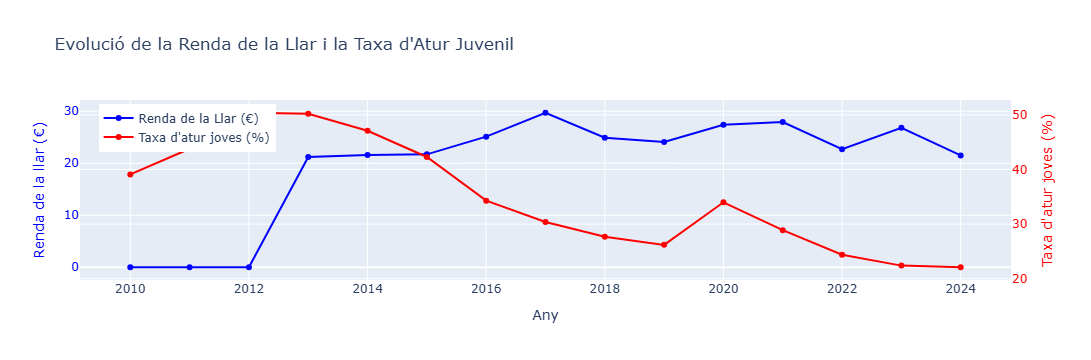

In [23]:
import plotly.graph_objects as go

fig = go.Figure()

# Línea 1: RendaLlar
fig.add_trace(go.Scatter(
    x=df_renda['anyy'],
    y=df_renda['RendaLlar'],
    mode='lines+markers',
    name='Renda de la Llar (€)',
    line=dict(color='blue')
))

# Línea 2: TxAturJoves (segundo eje Y)
fig.add_trace(go.Scatter(
    x=df_renda['anyy'],
    y=df_renda['TxAturJoves'],
    mode='lines+markers',
    name='Taxa d\'atur joves (%)',
    line=dict(color='red'),
    yaxis='y2'
))

# Configuración de los ejes
fig.update_layout(
    title="Evolució de la Renda de la Llar i la Taxa d'Atur Juvenil",
    xaxis=dict(title="Any"),
    yaxis=dict(title="Renda de la llar (€)", color='blue'),
    yaxis2=dict(
        title="Taxa d'atur joves (%)",
        overlaying='y',
        side='right',
        color='red'
    ),
    legend=dict(x=0.02, y=0.98)
)

fig.show()

#Grafico de lineas x=año Y= renta



In [24]:
correlacion = df_renda['RendaLlar'].corr(df_renda['TxAturJoves'])
correlacion


np.float64(-0.5646835980601193)

In [25]:
correlacion = df_union_5["ipc"].corr(df_union_5["salari"]) 
correlacion

np.float64(0.9114548584181119)

In [26]:
#scatter plot x= RendaLlar, y= anyy, tamaño = TxAturJoves size

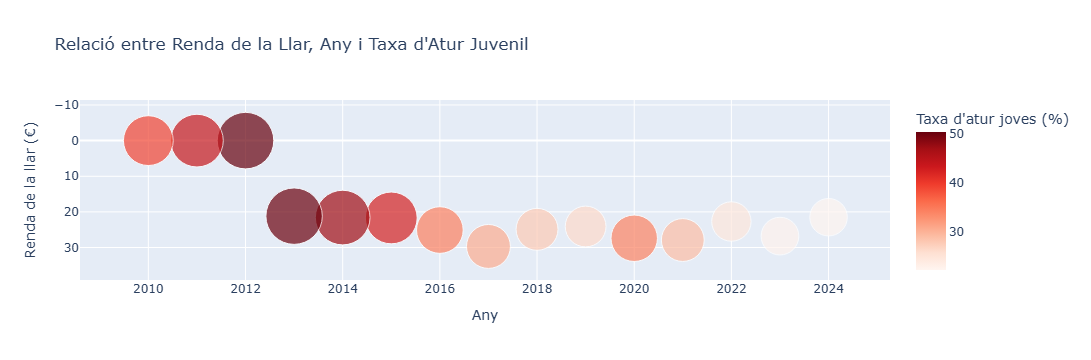

In [27]:
import plotly.express as px

fig = px.scatter(
    df_renda,
    x="anyy",
    y="RendaLlar",
    size="TxAturJoves",
    color="TxAturJoves",
    color_continuous_scale="Reds",
    title="Relació entre Renda de la Llar, Any i Taxa d'Atur Juvenil",
    labels={
        "RendaLlar": "Renda de la llar (€)",
        "anyy": "Any",
        "TxAturJoves": "Taxa d'atur joves (%)"
    },
    size_max=40
)

fig.update_layout(yaxis=dict(autorange="reversed"))  # opcional: anys de més nou a més antic

fig.show()
# Explicar 2010 2011 2012

In [28]:
df=df_union

correlacion = df["ipc"].corr(df["salari"])
correlacion


np.float64(0.9642901941715006)

In [29]:
"""0.964 → correlació molt forta i positiva
🧠 Interpretació directa
Quan l’IPC puja, el salari també puja.

La relació és molt intensa: IPC i salari es mouen gairebé de manera paral·lela.

No vol dir que un CAUSI l’altre, però sí que estan molt relacionats en el temps.

📈 Què implica això en el teu projecte?
✔️ IPC i salari evolucionen de manera molt similar
Això indica que els salaris han anat creixent a un ritme semblant al de la inflació.

✔️ El model de regressió lineal IPC → salari tindrà un bon ajust
Una correlació tan alta fa que la recta de regressió sigui molt fiable per descriure la tendència.

✔️ Pots justificar que l’IPC és un bon predictor del salari
Tot i que no és causalitat, sí que és un indicador molt alineat.

🎯 Com ho pots explicar a les conclusions
Et deixo una frase que pots utilitzar:

“La correlació entre l’IPC i el salari és de 0.964, un valor molt elevat que indica una relació lineal
forta i positiva. Això significa que, històricament, quan l’IPC ha augmentat, els salaris també ho 
han fet, seguint una tendència molt similar.”"""

'0.964 → correlació molt forta i positiva\n🧠 Interpretació directa\nQuan l’IPC puja, el salari també puja.\n\nLa relació és molt intensa: IPC i salari es mouen gairebé de manera paral·lela.\n\nNo vol dir que un CAUSI l’altre, però sí que estan molt relacionats en el temps.\n\n📈 Què implica això en el teu projecte?\n✔️ IPC i salari evolucionen de manera molt similar\nAixò indica que els salaris han anat creixent a un ritme semblant al de la inflació.\n\n✔️ El model de regressió lineal IPC → salari tindrà un bon ajust\nUna correlació tan alta fa que la recta de regressió sigui molt fiable per descriure la tendència.\n\n✔️ Pots justificar que l’IPC és un bon predictor del salari\nTot i que no és causalitat, sí que és un indicador molt alineat.\n\n🎯 Com ho pots explicar a les conclusions\nEt deixo una frase que pots utilitzar:\n\n“La correlació entre l’IPC i el salari és de 0.964, un valor molt elevat que indica una relació lineal\nforta i positiva. Això significa que, històricament, quan 

In [30]:
"""Interpretar una regressió lineal IPC → salari és una de les parts més importants del teu projecte, perquè et permet explicar com es relacionen realment aquestes dues variables i què significa el model que has construït. Et deixo una explicació clara, estructurada i útil per posar directament al teu treball.

📘 Interpretació de la regressió lineal IPC → salari
La regressió lineal que has calculat intenta descriure com varia el salari en funció de l’IPC.
El model té la forma:

𝑠
𝑎
𝑙
𝑎
𝑟
𝑖
=
𝑎
⋅
𝐼
𝑃
𝐶
+
𝑏
On:

a = pendent

b = intercept

IPC = variable independent

salari = variable dependent

A partir d’aquí, podem interpretar el model en tres nivells: estadístic, econòmic i predictiu.

1️⃣ Interpretació estadística
Correlació alta (0.96)
Una correlació de 0.964 indica una relació lineal molt forta i positiva entre IPC i salari.
Això vol dir que:

Quan l’IPC puja, el salari també ho fa.

Les dues sèries es mouen gairebé en paral·lel.

El model lineal és adequat per descriure la relació.

Pendent (coeficient)
La pendent indica quant augmenta el salari quan l’IPC puja una unitat.

Per exemple, si la pendent fos:

𝑎
=
120
Vol dir que per cada punt d’IPC, el salari mitjà augmenta 120 €.

Intercept
L’intercept és el valor del salari quan l’IPC és 0.
No té interpretació econòmica real, però és necessari per definir la recta.

2️⃣ Interpretació econòmica
✔️ Relació positiva forta
El model mostra que els salaris han anat creixent a mesura que augmentava el cost de la vida.

✔️ Ajust salarial a la inflació
Una correlació tan alta suggereix que:

Els salaris han estat parcialment indexats a la inflació.

No hi ha grans desconnexions entre IPC i salari.

✔️ Poder adquisitiu
Tot i que salari i IPC pugen junts, això no garanteix que el poder adquisitiu millori.
Caldria comparar:

salaris_real= salari - ipc

per veure si la gent guanya o perd capacitat de compra.

3️⃣ Interpretació predictiva
El model et permet predir el salari a partir d’un valor d’IPC futur.
Per exemple:

python
modelo.predict([[ipc_futur]])
Això és útil per:

Estimar salaris futurs si coneixes l’IPC previst.

Simular escenaris d’inflació alta o baixa.

Analitzar sensibilitat del salari a canvis en l’IPC.

🎯 Conclusió que pots posar al teu treball
“La regressió lineal IPC → salari mostra una relació molt forta i positiva (correlació 0.964). Això indica que, històricament, els salaris han evolucionat de manera molt similar a l’IPC. La pendent del model quantifica l’augment mitjà del salari per cada punt d’inflació, mentre que la forta correlació confirma que l’IPC és un bon predictor del salari. Tot i això, cal analitzar el salari real per determinar si el poder adquisitiu ha millorat o s’ha deteriorat.” """

'Interpretar una regressió lineal IPC → salari és una de les parts més importants del teu projecte, perquè et permet explicar com es relacionen realment aquestes dues variables i què significa el model que has construït. Et deixo una explicació clara, estructurada i útil per posar directament al teu treball.\n\n📘 Interpretació de la regressió lineal IPC → salari\nLa regressió lineal que has calculat intenta descriure com varia el salari en funció de l’IPC.\nEl model té la forma:\n\n𝑠\n𝑎\n𝑙\n𝑎\n𝑟\n𝑖\n=\n𝑎\n⋅\n𝐼\n𝑃\n𝐶\n+\n𝑏\nOn:\n\na = pendent\n\nb = intercept\n\nIPC = variable independent\n\nsalari = variable dependent\n\nA partir d’aquí, podem interpretar el model en tres nivells: estadístic, econòmic i predictiu.\n\n1️⃣ Interpretació estadística\nCorrelació alta (0.96)\nUna correlació de 0.964 indica una relació lineal molt forta i positiva entre IPC i salari.\nAixò vol dir que:\n\nQuan l’IPC puja, el salari també ho fa.\n\nLes dues sèries es mouen gairebé en paral·lel.\n\nEl model li

Predicciones: Predicciones: df_union5

In [31]:
df_union


,anyy,ipc,salari
0,2023,111.7,29978.69
1,2022,108.0,28774.55
2,2021,100.0,28145.02
3,2020,97.2,27100.11
4,2019,97.6,25968.20
5,2018,96.7,25552.84
6,2017,95.0,25180.45
7,2016,93.0,24454.64
8,2015,92.9,24321.57
9,2014,93.1,23927.17


Predicció del salari per al 2026: 32841.02 €


C:\Users\Alumne_mati1\Thonny\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



NameError: name 'y_pred' is not defined

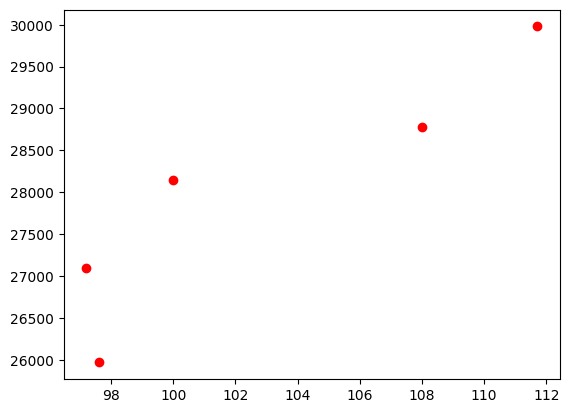

In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Dades
df = df_union_5

# Variables del model
X = df[["anyy"]]      # any com a predictor
y = df["salari"]      # salari com a variable dependent

# Entrenar el model
model = LinearRegression()
model.fit(X, y)

# Predicció per al 2026
pred_salari_2026 = model.predict(np.array([[2026]]))[0]

print(f"Predicció del salari per al 2026: {pred_salari_2026:.2f} €")

# ============================
# 8. Gráfico del modelo
# ============================
plt.scatter(df["ipc"], df["salari"], color="red", label="Datos reales")
plt.plot(df["ipc"], y_pred, color="blue", label="Regresión lineal")
plt.xlabel("IPC")
plt.ylabel("Salari (€)")
plt.title("Model de regressió lineal: IPC → Salari")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
df= df_union_5
from sklearn.linear_model import LinearRegression
import numpy as np

# Variables
X = df["anyy"].values.reshape(-1, 1)
y = df["salari"].values

# Modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Predicción para 2026
pred_2024 = modelo.predict(np.array([[2024]]))
print("Predicion de salario del 2024: ", round(pred_2024[0],2))


In [ ]:
y_ipc = df["ipc"].values
modelo_ipc = LinearRegression()
modelo_ipc.fit(X, y_ipc)

pred_ipc = modelo_ipc.predict(np.array([[2025]]))
pred_ipc
print("Predicion del IPC del 2025: ", round(pred_ipc[0],2))

In [ ]:
#